# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [42]:
from keras import backend as K
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report





import math
import numpy as np
import matplotlib.pyplot as plt


import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']



## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

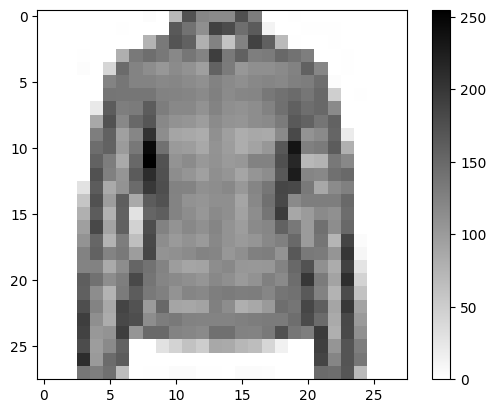

In [3]:
for image, label in test_dataset.take(1):
  break;
image = image.numpy().reshape((28, 28))
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Предобработка

**Нормализуйте данные X_train и X_test **

In [4]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels


train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [21]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 3.8987 - accuracy: 0.6924
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9456 - accuracy: 0.6951
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7855 - accuracy: 0.7399
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7048 - accuracy: 0.7633
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6748 - accuracy: 0.7796


### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [50]:
y_pred = model.predict(x_test, batch_size=32, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1000
           1       0.99      0.92      0.95      1000
           2       0.87      0.39      0.54      1000
           3       0.72      0.85      0.78      1000
           4       0.41      0.92      0.57      1000
           5       0.92      0.91      0.92      1000
           6       0.62      0.24      0.35      1000
           7       0.93      0.91      0.92      1000
           8       0.95      0.89      0.92      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.76     10000
   macro avg       0.81      0.76      0.76     10000
weighted avg       0.81      0.76      0.76     10000

